In [28]:
!pip install -r requirements.txt

In [29]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





## Non labeled data

In [30]:
data = pd.read_csv('output/twitter_tweets_20241130_133358.csv')

In [31]:
data.head()

,Tweet_id,User_name,Tweet_text,Language,Hashtags,Created_at,Search_Keyword
0,1853729719239233937,Elon Musk (Parody),Would you buy a Tesla phone?\n\nCheaper and be...,en,[],2024-11-05 09:23:00+00:00,Tesla
1,1862546527144603906,Ken Synopsis & Vancouver Real Estate,Optimus is going to be wild https://t.co/cDI6b...,en,[],2024-11-29 17:17:51+00:00,Tesla
2,1862169330286280855,Elon Musk (Parody),Should Tesla make a phone?\n\nBetter than Ipho...,en,[],2024-11-28 16:19:00+00:00,Tesla
3,1862166333234012621,Tesla,Happy Thanksgiving from our family to yours! h...,en,[],2024-11-28 16:07:05+00:00,Tesla
4,1861920164767490060,Elon Musk (Parody),What do you think of this Tesla concept?\n\nWo...,en,[],2024-11-27 23:48:54+00:00,Tesla


DataFrame Overview:
--------------------------------------------------

1. DataFrame Shape:
Total Rows: 180
Total Columns: 7

2. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_id        180 non-null    int64 
 1   User_name       180 non-null    object
 2   Tweet_text      180 non-null    object
 3   Language        180 non-null    object
 4   Hashtags        180 non-null    object
 5   Created_at      180 non-null    object
 6   Search_Keyword  180 non-null    object
dtypes: int64(1), object(6)
memory usage: 10.0+ KB
None

3. Missing Values:
Tweet_id          0
User_name         0
Tweet_text        0
Language          0
Hashtags          0
Created_at        0
Search_Keyword    0
dtype: int64

4. Basic Statistics for Numeric Columns:
           Tweet_id
count  1.800000e+02
mean   1.817471e+18
std    1.439934e+17



Hashtag Analysis:
--------------------------------------------------

Hashtag Statistics:
count    180.000000
mean       0.111111
std        0.537830
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Hashtag_Count, dtype: float64


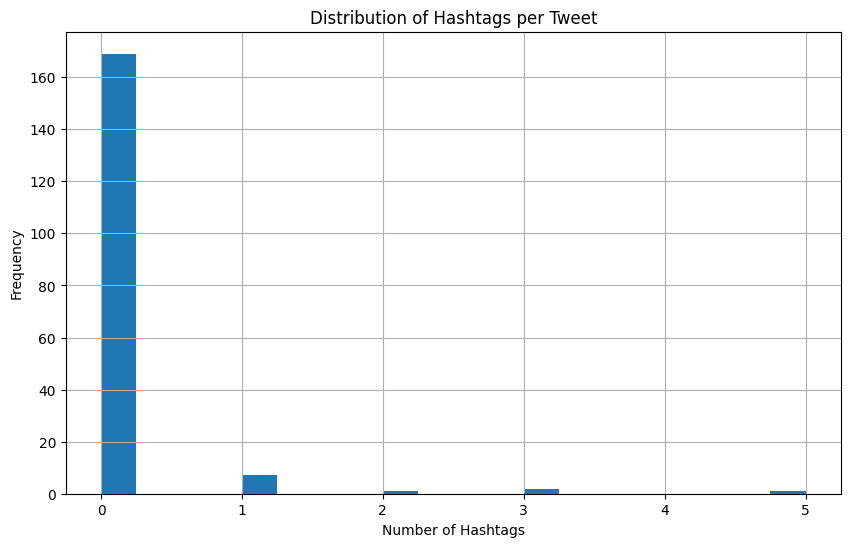


Keyword Analysis:
--------------------------------------------------

Search Keywords:
Search_Keyword
CyberTruck       56
Tesla            48
Tesla Model Y    44
Tesla Model 3    32
Name: count, dtype: int64



Text Analysis:
--------------------------------------------------

Tweet Length Statistics:
count     180.000000
mean      192.900000
std       240.394534
min        20.000000
25%        77.000000
50%       130.500000
75%       242.250000
max      2032.000000
Name: Tweet_Length, dtype: float64


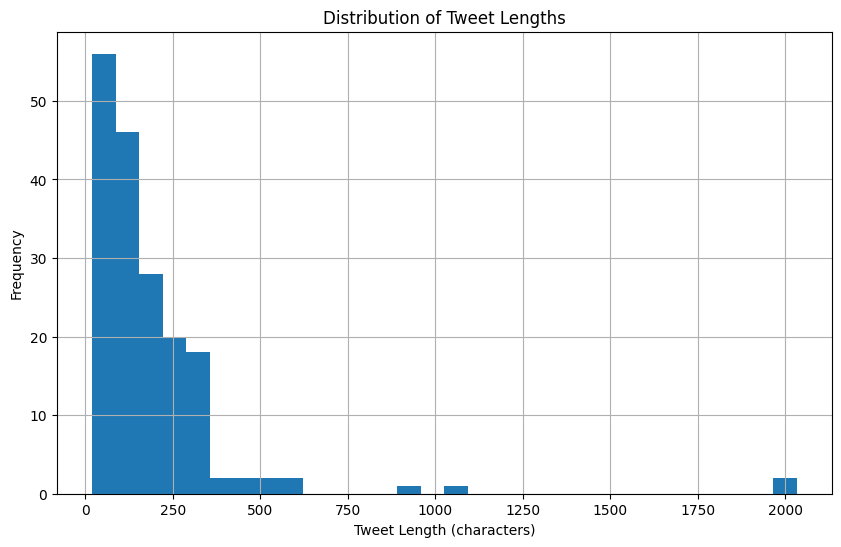


Word Count Statistics:
count    180.000000
mean      31.394444
std       44.481557
min        3.000000
25%       11.000000
50%       20.000000
75%       39.250000
max      401.000000
Name: Word_Count, dtype: float64


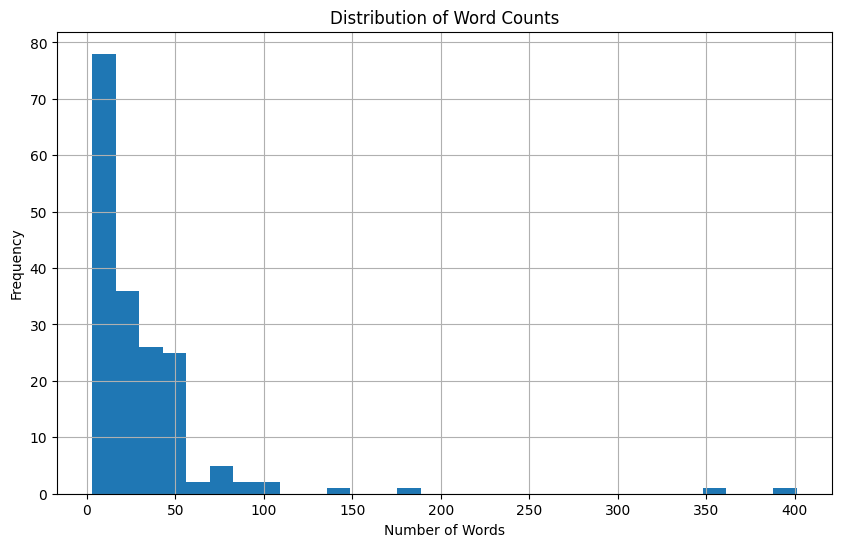


Word Frequency Analysis:
--------------------------------------------------


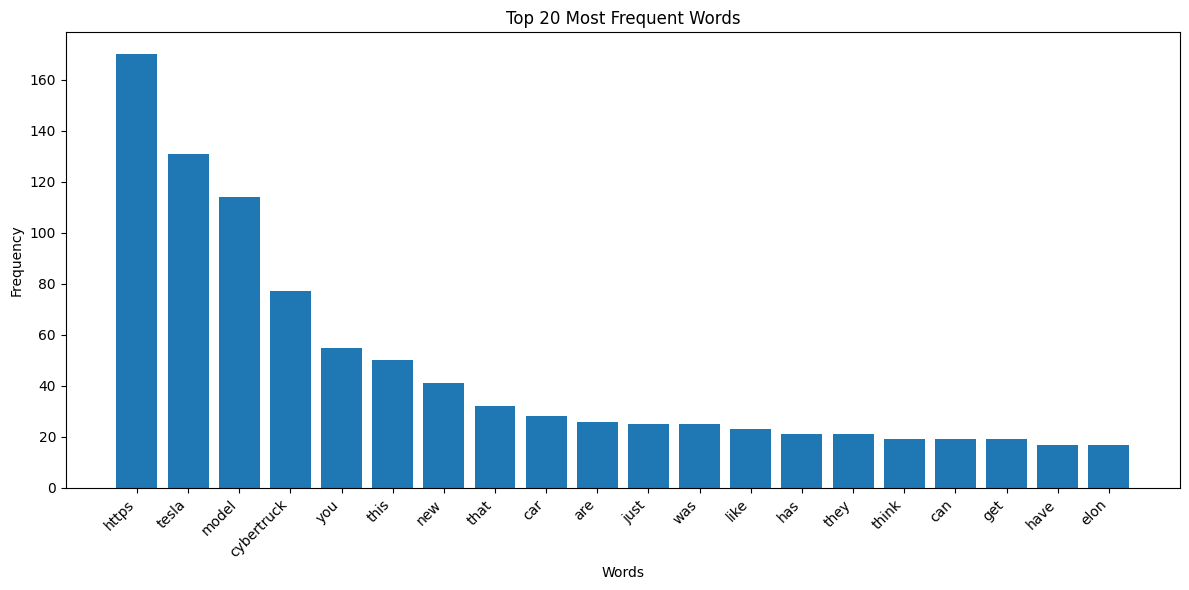


Top 20 Most Frequent Words:
https: 170
tesla: 131
model: 114
cybertruck: 77
you: 55
this: 50
new: 41
that: 32
car: 28
are: 26
just: 25
was: 25
like: 23
has: 21
they: 21
think: 19
can: 19
get: 19
have: 17
elon: 17


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


# Basic Overview
def basic_eda(data):
    print("DataFrame Overview:")
    print("-" * 50)
    
    # Basic Information
    print("\n1. DataFrame Shape:")
    print(f"Total Rows: {data.shape[0]}")
    print(f"Total Columns: {data.shape[1]}")
    
    print("\n2. Column Information:")
    print(data.info())
    
    print("\n3. Missing Values:")
    print(data.isnull().sum())
    
    print("\n4. Basic Statistics for Numeric Columns:")
    print(data.describe())


# User Analysis
def user_analysis(data):
    print("\nUser Analysis:")
    print("-" * 50)
    
    # Top Users
    top_users = data['User_name'].value_counts().head(10)
    print("\nTop 10 Users:")
    print(top_users)
    
    # Plotly Bar Chart for Top Users
    fig = px.bar(
        x=top_users.index, 
        y=top_users.values, 
        title='Top 10 Users by Tweet Count',
        labels={'x': 'User', 'y': 'Number of Tweets'}
    )
    fig.show()


# Hashtag Analysis
def hashtag_analysis(data):
    # Extract and flatten hashtags
    data['Hashtag_Count'] = data['Hashtags'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
    
    print("\nHashtag Analysis:")
    print("-" * 50)
    
    print("\nHashtag Statistics:")
    print(data['Hashtag_Count'].describe())
    
    # Histogram of Hashtag Counts
    plt.figure(figsize=(10, 6))
    data['Hashtag_Count'].hist(bins=20)
    plt.title('Distribution of Hashtags per Tweet')
    plt.xlabel('Number of Hashtags')
    plt.ylabel('Frequency')
    plt.show()


# Keyword Analysis
def keyword_analysis(data):
    print("\nKeyword Analysis:")
    print("-" * 50)
    
    keyword_counts = data['Search_Keyword'].value_counts()
    print("\nSearch Keywords:")
    print(keyword_counts)
    
    # Pie Chart of Keywords
    fig = px.pie(
        names=keyword_counts.index, 
        values=keyword_counts.values, 
        title='Search Keywords Distribution'
    )
    fig.show()


# Text Analysis
def text_analysis(data):
    print("\nText Analysis:")
    print("-" * 50)
    
    # Tweet Length Analysis
    data['Tweet_Length'] = data['Tweet_text'].str.len()
    
    print("\nTweet Length Statistics:")
    print(data['Tweet_Length'].describe())
    
    # Histogram of Tweet Lengths
    plt.figure(figsize=(10, 6))
    data['Tweet_Length'].hist(bins=30)
    plt.title('Distribution of Tweet Lengths')
    plt.xlabel('Tweet Length (characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Word Count Analysis
    data['Word_Count'] = data['Tweet_text'].str.split().str.len()
    
    print("\nWord Count Statistics:")
    print(data['Word_Count'].describe())
    
    # Histogram of Word Counts
    plt.figure(figsize=(10, 6))
    data['Word_Count'].hist(bins=30)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()


# Word Frequency Analysis
def word_frequency_analysis(data):
    print("\nWord Frequency Analysis:")
    print("-" * 50)
    
    # Combine all tweets
    all_tweets = ' '.join(data['Tweet_text'])
    
    # Basic word frequency
    from collections import Counter
    import re
    
    # Clean and tokenize
    words = re.findall(r'\w+', all_tweets.lower())
    
    # Remove very common words
    stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Count and display top words
    word_freq = Counter(words).most_common(20)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print word frequencies
    print("\nTop 20 Most Frequent Words:")
    for word, count in word_freq:
        print(f"{word}: {count}")


# Main Execution
def main_eda(data):
    basic_eda(data)
    user_analysis(data)
    hashtag_analysis(data)
    keyword_analysis(data)
    text_analysis(data)
    word_frequency_analysis(data)


# Run the EDA
main_eda(data)

## Labeled data

In [48]:
data_labeled = pd.read_csv('predictions_output.csv')

In [49]:
data_labeled.head()

,Tweet_id,User_name,Tweet_text,Language,Hashtags,Created_at,Search_Keyword,Predicted_Label,Prediction_Probability,Label
0,1853729719239233937,Elon Musk (Parody),would you buy a tesla phone\n\ncheaper and bet...,en,[],2024-11-05 09:23:00+00:00,Tesla,0,0.997223,0
1,1862546527144603906,Ken Synopsis & Vancouver Real Estate,optimus is going to be wild,en,[],2024-11-29 17:17:51+00:00,Tesla,0,0.997368,0
2,1862169330286280855,Elon Musk (Parody),should tesla make a phone\n\nbetter than iphon...,en,[],2024-11-28 16:19:00+00:00,Tesla,1,0.997845,1
3,1862166333234012621,Tesla,happy thanksgiving from our family to yours,en,[],2024-11-28 16:07:05+00:00,Tesla,1,0.997964,1
4,1862226046277337596,Elon Musk - Parody,hello friends\n\nwould you accept this tesla m...,en,[],2024-11-28 20:04:22+00:00,Tesla,0,0.997258,0


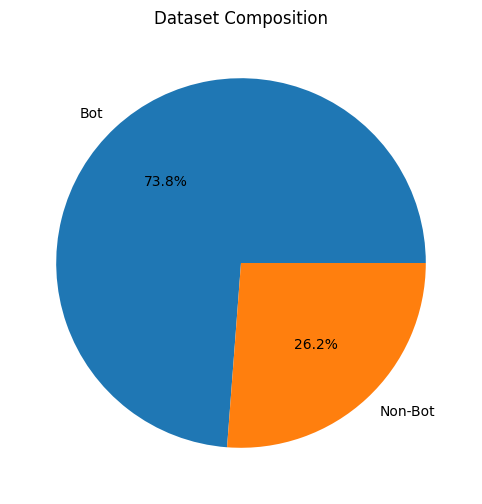


Dataset Composition:
Label
0    0.737968
1    0.262032
Name: proportion, dtype: float64


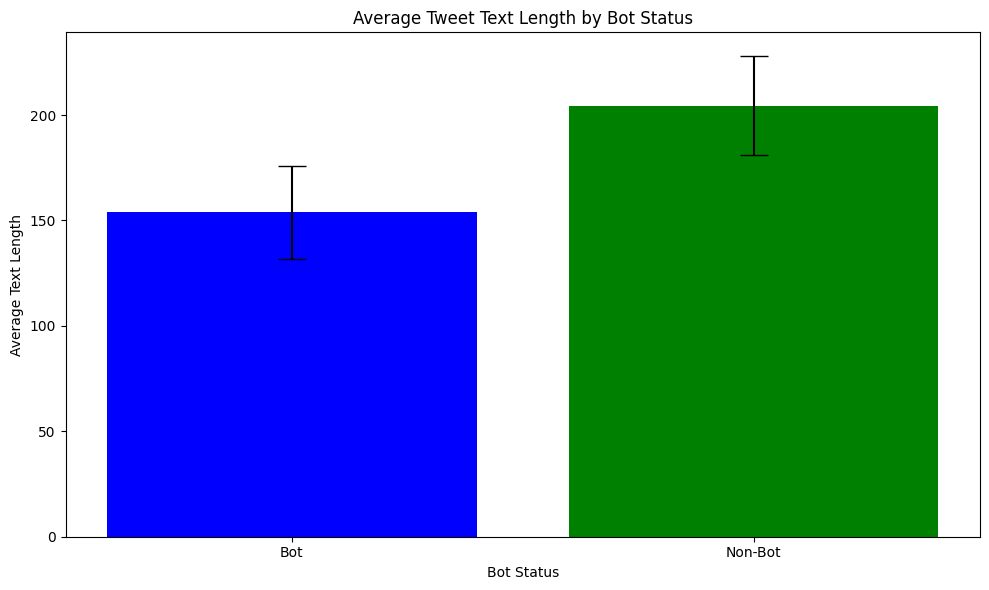


Text Length Statistics:
       count        mean         std   min    25%    50%     75%     max
Label                                                                   
0      138.0  153.789855  258.365566  16.0  45.25   85.5  168.75  1970.0
1       49.0  204.387755  164.249533  33.0  78.00  164.0  264.00   883.0


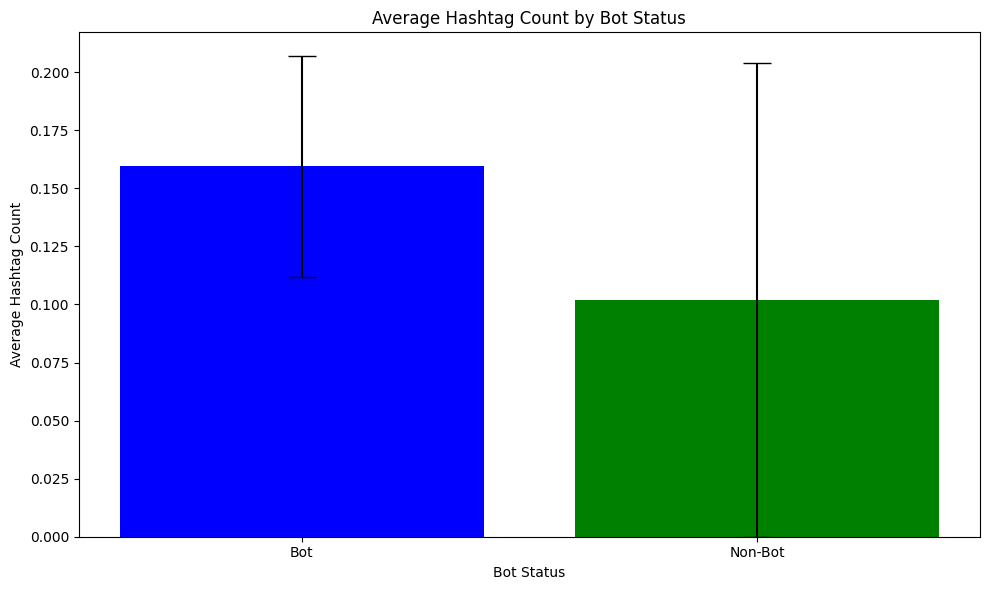


Hashtag Count Statistics:
       count      mean       std  min  25%  50%  75%  max
Label                                                    
0      138.0  0.159420  0.556926  0.0  0.0  0.0  0.0  4.0
1       49.0  0.102041  0.714286  0.0  0.0  0.0  0.0  5.0


<Figure size 1200x600 with 0 Axes>

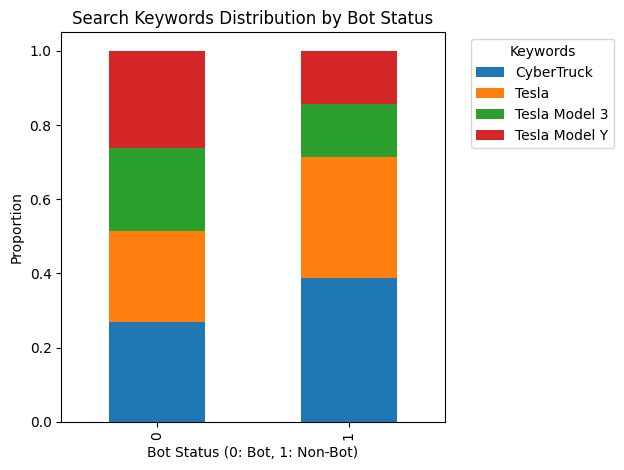


Top Keywords:
Search_Keyword
CyberTruck       0.299465
Tesla            0.267380
Tesla Model Y    0.229947
Tesla Model 3    0.203209
Name: proportion, dtype: float64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def detect_label_column(data):
    possible_columns = ['label', 'Label', 'Predicted_Label', 'bot_label']
    for col in possible_columns:
        if col in data.columns:
            return col
    raise ValueError("No label column found in the dataset")


def bot_eda(data):
    # Dynamically detect the label column
    label_column = detect_label_column(data)
    
    # 1. Dataset Composition
    def dataset_composition():
        plt.figure(figsize=(8, 6))
        label_counts = data[label_column].value_counts()
        plt.pie(label_counts, labels=['Bot', 'Non-Bot'], autopct='%1.1f%%')
        plt.title('Dataset Composition')
        plt.show()
        
        print("\nDataset Composition:")
        print(data[label_column].value_counts(normalize=True))
    
    # 2. Text Analysis
    def text_analysis():
        # Calculate text lengths
        data['Text_Length'] = data['Tweet_text'].str.len()
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        text_length_summary = data.groupby(label_column)['Text_Length'].agg(['mean', 'sem'])
        
        plt.bar(text_length_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                text_length_summary['mean'], 
                yerr=text_length_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Tweet Text Length by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Text Length')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of text length
        print("\nText Length Statistics:")
        print(data.groupby(label_column)['Text_Length'].describe())
    
    # 3. Hashtag Analysis
    def hashtag_analysis():
        # Ensure Hashtags is a list
        def safe_hashtag_count(x):
            try:
                return len(eval(x)) if isinstance(x, str) else 0
            except:
                return 0
        
        data['Hashtag_Count'] = data['Hashtags'].apply(safe_hashtag_count)
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        hashtag_summary = data.groupby(label_column)['Hashtag_Count'].agg(['mean', 'sem'])
        
        plt.bar(hashtag_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                hashtag_summary['mean'], 
                yerr=hashtag_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Hashtag Count by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Hashtag Count')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of hashtag count
        print("\nHashtag Count Statistics:")
        print(data.groupby(label_column)['Hashtag_Count'].describe())
    
    # 4. Keyword Analysis
    def keyword_analysis():
        plt.figure(figsize=(12, 6))
        keyword_counts = data.groupby([label_column, 'Search_Keyword']).size().unstack(fill_value=0)
        keyword_counts_normalized = keyword_counts.div(keyword_counts.sum(axis=1), axis=0)
        
        keyword_counts_normalized.plot(kind='bar', stacked=True)
        plt.title('Search Keywords Distribution by Bot Status')
        plt.xlabel('Bot Status (0: Bot, 1: Non-Bot)')
        plt.ylabel('Proportion')
        plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        print("\nTop Keywords:")
        print(data['Search_Keyword'].value_counts(normalize=True).head())
    
    # Run all analyses
    dataset_composition()
    text_analysis()
    hashtag_analysis()
    keyword_analysis()


# Execute EDA
bot_eda(data_labeled)

In [54]:
def network_analysis():
    plt.figure(figsize=(12, 6))
    
    # Followers count comparison
    plt.subplot(1, 2, 1)
    followers_summary = data.groupby(label_column)['Followers_Count'].agg(['mean', 'sem'])
    plt.bar(followers_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
            followers_summary['mean'], 
            yerr=followers_summary['sem'], 
            capsize=10,
            color=['blue', 'green'])
    plt.title('Average Followers Count')
    plt.xlabel('Bot Status')
    plt.ylabel('Average Followers')
    
    # Friends count comparison
    plt.subplot(1, 2, 2)
    friends_summary = data.groupby(label_column)['Friends_Count'].agg(['mean', 'sem'])
    plt.bar(friends_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
            friends_summary['mean'], 
            yerr=friends_summary['sem'], 
            capsize=10,
            color=['blue', 'green'])
    plt.title('Average Friends Count')
    plt.xlabel('Bot Status')
    plt.ylabel('Average Friends')
    
    plt.tight_layout()
    plt.show()

In [55]:
def engagement_analysis():
    plt.figure(figsize=(12, 6))
    
    # Retweet count comparison
    plt.subplot(1, 2, 1)
    retweet_summary = data.groupby(label_column)['Retweet_Count'].agg(['mean', 'sem'])
    plt.bar(retweet_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
            retweet_summary['mean'], 
            yerr=retweet_summary['sem'], 
            capsize=10,
            color=['blue', 'green'])
    plt.title('Average Retweet Count')
    plt.xlabel('Bot Status')
    plt.ylabel('Average Retweets')
    
    # Likes count comparison
    plt.subplot(1, 2, 2)
    likes_summary = data.groupby(label_column)['Likes_Count'].agg(['mean', 'sem'])
    plt.bar(likes_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
            likes_summary['mean'], 
            yerr=likes_summary['sem'], 
            capsize=10,
            color=['blue', 'green'])
    plt.title('Average Likes Count')
    plt.xlabel('Bot Status')
    plt.ylabel('Average Likes')
    
    plt.tight_layout()
    plt.show()